In [1]:
import corenlp
import os
import requests
import re
import glob
from tqdm import tqdm_notebook
os.environ['CORENLP_HOME'] = '/Users/dragonfly/Desktop/Research/Extractive_Summarization_code/CoreNLP/stanford-corenlp-4.1.0'

In [2]:
article = "A paragraph is a group of words put together to form a group that is usually longer than a sentence. Paragraphs are often made up of several sentences. There are usually between three and eight sentences. Paragraphs can begin with an indentation, or by missing a line out, and then starting again. This makes it easier to see when one paragraph ends and another begins."
title = "paragraph is a group of sentence."

# Pre-settings

### test corenlp.Client

In [4]:
text = "Kally said she can sleep. Faster than anyone."
with corenlp.CoreNLPClient(annotators="tokenize ssplit pos lemma ner depparse coref".split()) as client:
    ann = client.annotate(text)
ann

text: "Kally said she can sleep. Faster than anyone."
sentence {
  token {
    word: "Kally"
    pos: "NNP"
    value: "Kally"
    before: ""
    after: " "
    originalText: "Kally"
    ner: "PERSON"
    lemma: "Kally"
    beginChar: 0
    endChar: 5
    utterance: 0
    speaker: "PER0"
    tokenBeginIndex: 0
    tokenEndIndex: 1
    hasXmlContext: false
    corefClusterID: 1
  }
  token {
    word: "said"
    pos: "VBD"
    value: "said"
    before: " "
    after: " "
    originalText: "said"
    ner: "O"
    lemma: "say"
    beginChar: 6
    endChar: 10
    utterance: 0
    speaker: "PER0"
    tokenBeginIndex: 1
    tokenEndIndex: 2
    hasXmlContext: false
  }
  token {
    word: "she"
    pos: "PRP"
    value: "she"
    before: " "
    after: " "
    originalText: "she"
    ner: "O"
    lemma: "she"
    beginChar: 11
    endChar: 14
    utterance: 0
    speaker: "PER0"
    tokenBeginIndex: 2
    tokenEndIndex: 3
    hasXmlContext: false
    corefClusterID: 1
    gender: "FEMALE"
 

In [5]:
text = "Find the compound word."
with corenlp.CoreNLPClient(annotators="tokenize ssplit pos lemma ner depparse coref".split()) as client:
    ann = client.annotate(text)
ann

text: "Find the compound word."
sentence {
  token {
    word: "Find"
    pos: "VB"
    value: "Find"
    before: ""
    after: " "
    originalText: "Find"
    ner: "O"
    lemma: "find"
    beginChar: 0
    endChar: 4
    utterance: 0
    speaker: "PER0"
    tokenBeginIndex: 0
    tokenEndIndex: 1
    hasXmlContext: false
  }
  token {
    word: "the"
    pos: "DT"
    value: "the"
    before: " "
    after: " "
    originalText: "the"
    ner: "O"
    lemma: "the"
    beginChar: 5
    endChar: 8
    utterance: 0
    speaker: "PER0"
    tokenBeginIndex: 1
    tokenEndIndex: 2
    hasXmlContext: false
  }
  token {
    word: "compound"
    pos: "NN"
    value: "compound"
    before: " "
    after: " "
    originalText: "compound"
    ner: "O"
    lemma: "compound"
    beginChar: 9
    endChar: 17
    utterance: 0
    speaker: "PER0"
    tokenBeginIndex: 2
    tokenEndIndex: 3
    hasXmlContext: false
  }
  token {
    word: "word"
    pos: "NN"
    value: "word"
    before: " "
    af

### ann_sent_info:  
turn the annotate text into sent_list which contain three component  
    - input: text
    - output: sent_list
        - 'sent': str, oringal input string
        - 'token': list of word appear in sent
        - 'dep': dependency between two words    

In [3]:
### orginize sent_info
def ann_sent_info(text):
    sent_list = []

    with corenlp.CoreNLPClient(annotators="tokenize ssplit pos lemma ner depparse coref".split()) as client:
        ann = client.annotate(text) # CoreNLP client
    for sent_idx in range(len(ann.sentence)):
        sent_info = {}
        sent_info["sent"] = text
        sent_info["token"] = [] # info of each token
        for idx, i in enumerate(ann.sentence[sent_idx].token):
            s = {
                "word": i.word,
                "pos": i.pos,
                "ner": i.ner,
                "lemma": i.lemma,
                "sent_idx": sent_idx,
                "idx": idx,
            }
            sent_info["token"].append(s)

        sent_info["dep"] = [] # info of the dependency between tokens
        for idx, i in enumerate(ann.sentence[sent_idx].basicDependencies.edge):
            dep = {
                "source": i.source-1,
                "target": i.target-1,
                "dep": i.dep,
                "sent_idx": sent_idx
            }
            sent_info["dep"].append(dep)
        sent_list.append(sent_info)
    return sent_list

# example
ann_sent_info("Jon Sena gave up finding his make up in the World Wild University.") # input text can be more than one sentence. Return list of sentence_info

[{'sent': 'Jon Sena gave up finding his make up in the World Wild University.',
  'token': [{'word': 'Jon',
    'pos': 'NNP',
    'ner': 'PERSON',
    'lemma': 'Jon',
    'sent_idx': 0,
    'idx': 0},
   {'word': 'Sena',
    'pos': 'NNP',
    'ner': 'PERSON',
    'lemma': 'Sena',
    'sent_idx': 0,
    'idx': 1},
   {'word': 'gave',
    'pos': 'VBD',
    'ner': 'O',
    'lemma': 'give',
    'sent_idx': 0,
    'idx': 2},
   {'word': 'up',
    'pos': 'RP',
    'ner': 'O',
    'lemma': 'up',
    'sent_idx': 0,
    'idx': 3},
   {'word': 'finding',
    'pos': 'VBG',
    'ner': 'O',
    'lemma': 'find',
    'sent_idx': 0,
    'idx': 4},
   {'word': 'his',
    'pos': 'PRP$',
    'ner': 'O',
    'lemma': 'he',
    'sent_idx': 0,
    'idx': 5},
   {'word': 'make',
    'pos': 'NN',
    'ner': 'O',
    'lemma': 'make',
    'sent_idx': 0,
    'idx': 6},
   {'word': 'up',
    'pos': 'RP',
    'ner': 'O',
    'lemma': 'up',
    'sent_idx': 0,
    'idx': 7},
   {'word': 'in',
    'pos': 'IN',
    'n

### create_all_nodes:
    - input: sent_list
    - output: node_dict, node_index
    - explain:
        1. process each sentence and each token
        2. process token with lemma (turn the token to original_form ex: ran=>run)
        3. turn all pos within three types: noun, verb, adj
        4. find if there are compound_dep between token (two ways of checking:)
            4.1. process_compound_ner (create node by compound_list)  
                 if not compound_word, create node directly
            4.2. process_compound_dep (create node by compound_dep)  
                 if compound_dep exist
                     merge two node with compound_dep and delete merge_node from node_dict

In [4]:
### create all nodes
def create_all_nodes(sent_list):
    node_dict = {}  # save the nodes
    node_index = {} # table convert tok_sent_idx to node_key

    for sent_idx, sent_info in enumerate(sent_list):
        node_index[sent_idx] = {}
        
        same_ner = ""
        compound_list = []
        for tok in sent_info['token']:
            if check_compound(tok):
                compound_list.append(tok)
                continue
            elif check_compound(tok) is False and len(compound_list) > 0:
                node_dict, node_index = process_compound_ner(compound_list, node_dict, node_index) #######
                compound_list = []
                
                node_key = tok['lemma'] + "=" + pos_original_form(tok['pos'])
                node_index[sent_idx][tok['idx']] = node_key
            else:    
                node_key = tok['lemma'] + "=" + pos_original_form(tok['pos'])
                node_index[sent_idx][tok['idx']] = node_key
            
            # save node_key in node_dict
            if node_key not in node_dict:
                node_dict[node_key] = [tok]
            else:
                node_dict[node_key].append(tok)
                
        # 從dependency 找 compound
        node_dict, node_index = process_compound_dep(sent_info, node_dict, node_index)
    return node_dict, node_index

def check_compound(tok):
    if tok['ner'] == 'O':
        return False
    else:
        return True

def process_compound_ner(compound_list, node_dict, node_index):
    node_key = ""
    cw_list = []
    for cw in compound_list: # connect words in compound_list to form node_key
        cw_list.append(cw['lemma'])
    node_key = "_".join(cw_list) + '=' + pos_original_form(compound_list[-1]['pos'])

    for cw in compound_list: # save node_index
        node_index[cw['sent_idx']][cw['idx']] = node_key
    
    if node_key not in node_dict: # save compound_list and key back to node_dict
        node_dict[node_key] = compound_list
    else:
        node_dict[node_key].extend(compound_list)
    
    return node_dict, node_index

def process_compound_dep(sent_info, node_dict, node_index):
    for dep in sent_info['dep']:
        if "compound" in dep['dep']:
            source_node_key = node_index[dep['sent_idx']][dep['source']]
            if len(node_dict[source_node_key]) > 1: # node already merged (by ner
                continue
            else:
                merge_two_node(node_dict, node_index, sent_info['token'], dep)
    return node_dict, node_index

def merge_two_node(node_dict, node_index, tok, dep):
    source_idx = dep['source']
    target_idx = dep['target']
    sent_idx = dep['sent_idx']

    tok_original_pos = pos_original_form( tok[source_idx]['pos'] )
    if dep['dep'] == "compound:prt":
        node_key = tok[source_idx]['lemma'] + '_' + tok[target_idx]['lemma'] + "=" + tok_original_pos
    else:
        node_key = tok[target_idx]['lemma'] + '_' + tok[source_idx]['lemma'] + "=" + tok_original_pos

#     print("==============")
#     print(node_key)
#     print(node_index[sent_idx][source_idx])
#     print(node_index[sent_idx][target_idx])
#     print("==============")
    
    remove_before_merge_node(node_dict, node_index[sent_idx][source_idx], sent_idx, source_idx)
    remove_before_merge_node(node_dict, node_index[sent_idx][target_idx], sent_idx, target_idx)
    node_index[sent_idx][source_idx] = node_key
    node_index[sent_idx][target_idx] = node_key

    if node_key not in node_dict:
        node_dict[node_key] = [tok[source_idx], tok[target_idx]]
    else:
        node_dict[node_key].extend([tok[source_idx], tok[target_idx]])
#    return node_dict, node_index    


verb_list = ["VB","VBD","VBG","VBN","VBP","VBZ","VH","VHD","VHG","VHN","VHP","VHZ","VV","VVD","VVG","VVN","VVP","VVZ"]
noun_list = ["NN", "NNS", "NP", "NPS", "NNP", "PRP", "PP"]
adj_list  = ["JJ", "JJR", "JJS"]
def pos_original_form(pos):    
    if pos in verb_list:
        return "VB"
    elif pos in noun_list:
        return "NN"
    elif pos in adj_list:
        return "JJ"
    else:
        return pos

def remove_before_merge_node(node_dict, node_key, sent_idx, idx):
#     if node_key not in node_dict:
#         pass
#     print("key:", node_key)
#     print("node_dict:", node_dict[node_key])
    if len(node_dict[node_key]) > 1:
        for node_idx, node in enumerate(node_dict[node_key]):
#            print(node_idx, node)
#            print("!", node['sent_idx'], sent_idx, node['idx'], idx)
            if node['sent_idx'] == sent_idx and node['idx'] == idx:
                del node_dict[node_key][node_idx]
#                print("@", node_dict[node_key])
                break
    else:
        node_dict.pop(node_key)

# example
#text = "Taiwan engineers lives in Taiwan house."
#text = "Taiwan is where Taiwan engineers lives."
text = "Robin Kuo took off his shoe. Robin give up. Kevin also will not give up."
sent_list = ann_sent_info(text)
node_dict, node_index = create_all_nodes(sent_list)
print(node_index)
print(node_dict.keys())

{0: {0: 'Robin_Kuo=NN', 1: 'Robin_Kuo=NN', 2: 'take_off=VB', 3: 'take_off=VB', 4: 'he=PRP$', 5: 'shoe=NN', 6: '.=.'}, 1: {0: 'Robin=NN', 1: 'give_up=VB', 2: 'give_up=VB', 3: '.=.'}, 2: {0: 'Kevin=NN', 1: 'also=RB', 2: 'will=MD', 3: 'not=RB', 4: 'give_up=VB', 5: 'give_up=VB', 6: '.=.'}}
dict_keys(['Robin_Kuo=NN', 'he=PRP$', 'shoe=NN', '.=.', 'take_off=VB', 'Robin=NN', 'give_up=VB', 'Kevin=NN', 'also=RB', 'will=MD', 'not=RB'])


### create_relation_between_node
    - return dep_list
    - explain clean the dependency in two ways:
        1. all_dep=True (take all dependency parsing relation)
        2. all_dep=False (only capture following dep)
            - 'nsubj' [[describe noun]]
                - The car is red. [red->car]
                - She gave me a raise. [gave->she]
            - 'obl','obj', 'lobj, 'dobj', 'iobj' [[verb to noun]]
                - She gave me a raise. 
                    - obj: [gave->raise]
                    - dobj:[gave->raise]
                    - iobj:[gave->me]
                - give the toys to the childern
                    - obj: [give->toys]
                    - lobj:[give->childern]
                - give childern the toys
                    - obj: [give->toys]
                    - obl: [give->childern]
            - 'xcomp', 'ccomp' [[verb or adj predicate]]
                - He looks very cool. xcomp:[look->cool]
                - He says you like to swim. ccomp:[says->like]
            - 'nmod' [[describe noun]]
                - Some of the toys. [some->toys]
            - 'advmod'
                - less often [often->less] ==> [less->often]
            - 'conj'
                - He is cool, nice and tall. [cool->nice->tall]
                     - ('cool=JJ', 'he=NN', 'nsubj')
                     - ('nice=JJ', 'he=NN', 'nsubj')
                     - ('tall=JJ', 'he=NN', 'nsubj')

In [63]:
def create_relation_between_node(sent_list, node_dict, node_index, all_dep=False):
    dep_list = []
    for sent_idx, sent_info in enumerate(sent_list):
        if all_dep:
            for dep in sent_info["dep"]:
                source = node_index[sent_idx][ dep['source'] ]
                target = node_index[sent_idx][ dep['target'] ]
                dep_list.append((source, target, dep['dep']))
        else:
            for dep in sent_info["dep"]:
                source = node_index[sent_idx][ dep['source'] ]
                target = node_index[sent_idx][ dep['target'] ]
                if dep['dep'] == 'nsubj':
                    dep_list.append((source, target, dep['dep']))
                elif dep['dep'] in ['obl','obj', 'lobj', 'dobj', 'iobj']:
                    dep_list.append((source, target, dep['dep']))
                elif dep['dep'] in ['xcomp', 'ccomp']:
                    dep_list.append((source, target, dep['dep']))
                elif dep['dep'] in ['advmod']: # reverse: big->very => very->big
                     dep_list.append((target, source, dep['dep']))
#                    dep_list.append((source, target, dep['dep']))
                elif dep['dep'] == 'nmod':
                    dep_list.append((source, target, dep['dep']))
                elif dep['dep'] == "conj":
                    for past_dep in dep_list:
                        past_source = past_dep[0]
                        past_target = past_dep[1]
                        past_dep = past_dep[2]
                        if source == past_source:  # text = "I am tall and cool."
                            dep_list.append((target, past_target, past_dep))
                            break
                        elif source == past_target: # text = "I eat egg and pie."
                            dep_list.append((past_source, target, past_dep))
                            break
                    # before: ('strong=JJ', 'Robin=NN', 'nsubj'), ('strong=JJ', 'tall=JJ', 'conj')
                    # after:  ('strong=JJ', 'Robin=NN', 'nsubj'), ('tall=JJ', 'Robin=NN', 'nsubj')
    return dep_list

# example
# text = "I drink water, milk and juice."
#text = "Robin took off his shoe and ran into the water. After he returned the shoe was gone."
# text = "Robin Kuo took off his shoe. Robin give up. Kevin also will not give up."
text = "He is cool, nice and tall"
# #text = "Jon Sena gave up his dinner table in the World Wild University. He later give up another dinner table here."
sent_list = ann_sent_info(text)
node_dict, node_index = create_all_nodes(sent_list)
dep_list = create_relation_between_node(sent_list, node_dict, node_index, all_dep=False)
dep_list

### draw graph

In [6]:
import networkx as nx 
import matplotlib.pyplot as plt 

def draw_undirect_graph(dep_list):
    G = nx.MultiGraph() 
    relations = dep_list
    
    for i in relations: 
        G.add_edge(i[0], i[1], relation = i[2]) 

    plt.figure(figsize =(9, 9)) 
    nx.draw_networkx(G, with_label = True, node_color="yellow") 

    # getting various graph properties 
    print("Total number of nodes: ", int(G.number_of_nodes())) 
    print("Total number of edges: ", int(G.number_of_edges())) 
    print("List of all nodes: ", list(G.nodes())) 
    print("List of all edges: ", list(G.edges(data = True))) 
    print("Degree for all nodes: ", dict(G.degree())) 
    return G
# example
# dep_list = [(1,2,'a'), (2,3, "b")]
# draw_graph(dep_list)

In [7]:
def draw_direct_graph(dep_list):
    G = nx.DiGraph() 
    
    nodes_list = []
    for node in dep_list:
        nodes_list.append( (node[0], node[1]) )
    #nodes_list = [(1,1),(2,2),(3,2)]
    #nodes_list = [('2=end', '1=The'), ('6=command', '4=the'),('2=end', '6=command'),('2=end', '7=.'),('6=command', '3=of'),('6=command', '5=CPU')]
    G.add_edges_from(nodes_list)

    plt.figure(figsize =(9, 9)) 
    nx.draw_networkx(G, with_label = True, node_color ='yellow') 

    # getting different graph attributes 
    print("Total number of nodes: ", int(G.number_of_nodes())) 
    print("Total number of edges: ", int(G.number_of_edges())) 
    print("List of all nodes: ", list(G.nodes())) 
    print("List of all edges: ", list(G.edges())) 
    print("In-degree for all nodes: ", dict(G.in_degree())) 
    print("Out degree for all nodes: ", dict(G.out_degree)) 
    print("Total number of self-loops: ", int(G.number_of_selfloops())) 


###### text_to_graph v1 (direct vs undirect)

/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


Total number of nodes:  4
Total number of edges:  3
List of all nodes:  ['play=VB', 'she=NN', 'piano=NN', 'flute=NN']
List of all edges:  [('play=VB', 'she=NN'), ('play=VB', 'piano=NN'), ('play=VB', 'flute=NN')]
In-degree for all nodes:  {'play=VB': 0, 'she=NN': 1, 'piano=NN': 1, 'flute=NN': 1}
Out degree for all nodes:  {'play=VB': 3, 'she=NN': 0, 'piano=NN': 0, 'flute=NN': 0}
Total number of self-loops:  0


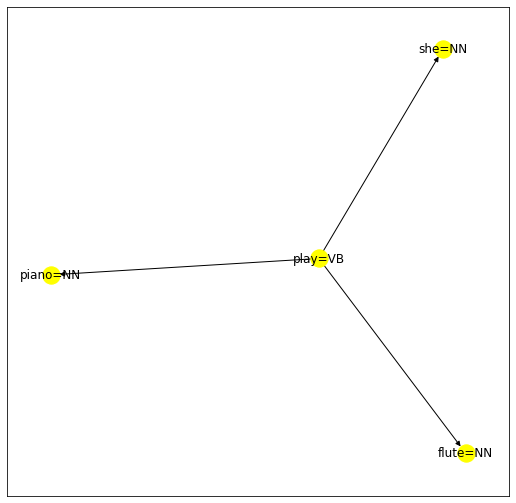

In [66]:
def text_to_graph(text, direct_graph=False):
    sent_list = ann_sent_info(text)
    node_dict, node_index = create_all_nodes(sent_list)
    dep_list = create_relation_between_node(sent_list, node_dict, node_index)
    if direct_graph is True:
        draw_direct_graph(dep_list)
    else:
        draw_undirect_graph(dep_list)
    
#text = "I give the toy to her."
#text = "Robin took off his shoe and ran into the water. After he returned the shoe was gone."
# text = "Jon Sena gave up his dinner table in the World Wild University. He later gave up his bag."
# text = "Robin Kuo gave the toy to the child. Robin recive my toy."
#text = "An open compound word is created in cases when the modifying adjective is used with its noun to create a new noun. This isn’t quite the same as a noun with a modifying adjective. We just use a space between the adjective and the noun, so sometimes it can be hard to identify as a compound; however, if the two words are commonly used together, it’s considered to be a compound word."
text = "She play piano and flute."
direct_graph = True
text_to_graph(text, direct_graph)

In [12]:
# '''
# A paragraph is a group of words put together to form a group that is usually longer than a sentence. 
# Paragraphs are often made up of several sentences. There are usually between three and eight sentences. 
# Paragraphs can begin with an indentation (about five spaces), or by missing a line out, and then starting again. 
# This makes it easier to see when one paragraph ends and another begins.
# '''

##### text_to_graph v2 (return only undirect Graph )

/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


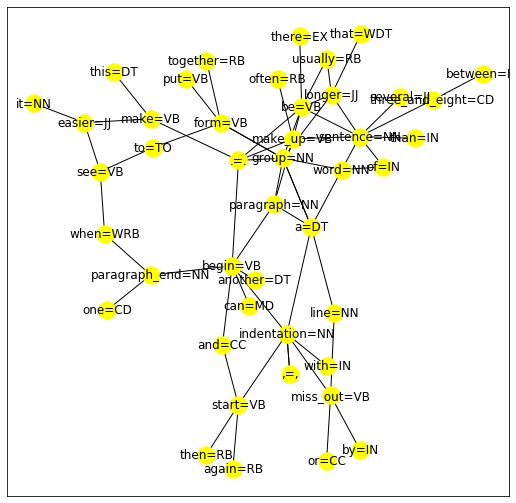

In [13]:
import networkx as nx 
import matplotlib.pyplot as plt 

def text_to_graph(text, print_graph=False, all_dep = True):
    sent_list = ann_sent_info(text)
    node_dict, node_index = create_all_nodes(sent_list)
    dep_list = create_relation_between_node(sent_list, node_dict, node_index, all_dep)
    
    G = nx.MultiGraph() 
    relations = dep_list
    for i in relations: 
        G.add_edge(i[0], i[1], relation = i[2]) 
    if print_graph:
        plt.figure(figsize =(9, 9)) 
        nx.draw_networkx(G, with_label = True, node_color="yellow") 
    return G

text = "A paragraph is a group of words put together to form a group that is usually longer than a sentence. Paragraphs are often made up of several sentences. There are usually between three and eight sentences. Paragraphs can begin with an indentation, or by missing a line out, and then starting again. This makes it easier to see when one paragraph ends and another begins."
source_text_graph = text_to_graph(text, print_graph=True)

In [14]:
def create_coverage_dict(root, Graph):
    coverage = {}
    coverage[root] = {}
    first_level_nodes = list(Graph.neighbors(root))
    overlap_node_set = set(Graph.neighbors(root))
    for i in first_level_nodes:
        if i != root:
            second_level_nodes = list(Graph.neighbors(i))
            overlap_node_set.union(set(second_level_nodes))
            # flatten dict without root and itself
            coverage[root][i] = [node for node in second_level_nodes if node != root and node != i] 
    return coverage, overlap_node_set

# example
#root = 4
#create_coverage_dict(root, G)

In [15]:
# cal_coverage
def cal_overlap_score(overlap_node_set,G):
    all_node = G.number_of_nodes()
    overlap_score = len(overlap_node_set) / all_node
    print("overlap_nodes_score = %.2f" % overlap_score)
    return overlap_score

def coverage_score_per_node(coverage):
    root = list(coverage.keys())[0]
    total_count = 0
    score = 0
    l1_score = 1
    l2_score = 0.5
    for l_1 in coverage[root]:
        total_count += 1
        score += l1_score
        for l_2 in coverage[root][l_1]:
            total_count += 1
            score += l2_score
    coverage_score_this_node = score/total_count
    #print("coverage_per_node_score=%.2f" % (coverage_score_this_node) )
    return coverage_score_this_node

# root = 2
# coverage, overlap_node_set = create_coverage_dict(root, G)
# cal_overlap_score(overlap_node_set,G)
# coverage_score_per_node(coverage)

['group=NN', 'paragraph=NN', 'sentence=NN']


/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


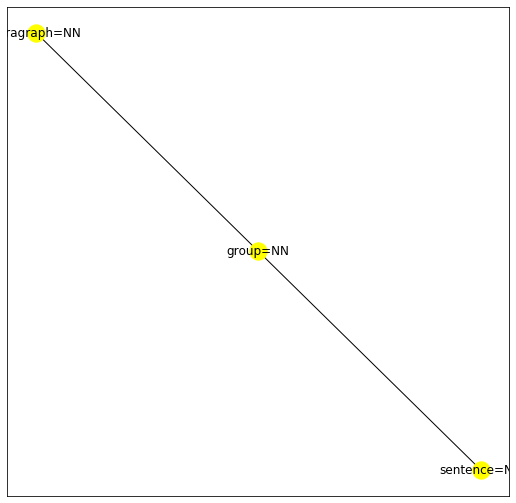

In [16]:
title = "Paragraph is a group of sentence."
title_graph = text_to_graph(title, True, all_dep=False)
title_node_list = list(title_graph.nodes())
print(title_node_list)

In [17]:
overlap_node_set = set()
for tn in title_node_list:
    print(tn)
    coverage, node_set = create_coverage_dict(tn, source_text_graph)
    print(node_set)
    overlap_node_set = overlap_node_set.union(node_set)
overlap_node_set

group=NN
{'word=NN', 'a=DT', '.=.', 'form=VB', 'paragraph=NN', 'be=VB', 'longer=JJ'}
paragraph=NN
{'group=NN', 'begin=VB', 'a=DT', 'make_up=VB'}
sentence=NN
{'than=IN', 'a=DT', 'make_up=VB', 'be=VB', 'three_and_eight=CD', 'of=IN', 'several=JJ', 'longer=JJ'}


{'.=.',
 'a=DT',
 'be=VB',
 'begin=VB',
 'form=VB',
 'group=NN',
 'longer=JJ',
 'make_up=VB',
 'of=IN',
 'paragraph=NN',
 'several=JJ',
 'than=IN',
 'three_and_eight=CD',
 'word=NN'}

# Final Score

coverage score is calulate base on overlap nodes from source_text and summary

/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


overlap_nodes_score = 0.40
final score: 0.16, coverage-score: 0.41


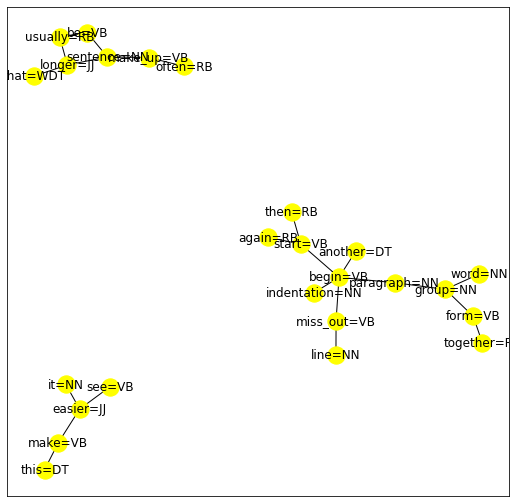

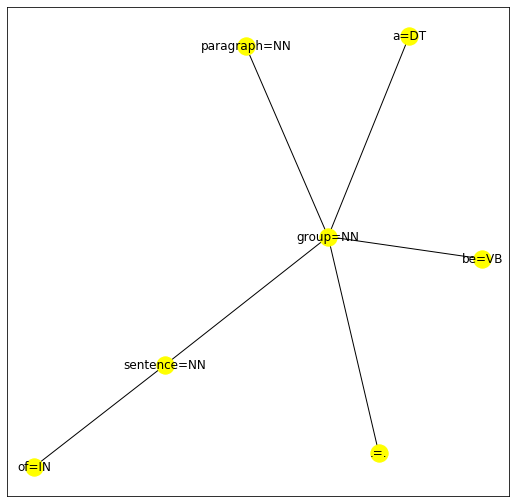

In [18]:
def final_score(text, summary):
    source_text_graph = text_to_graph(text, print_graph=True, all_dep=False)
    summary_graph = text_to_graph(summary, print_graph=True, all_dep=True)
    summary_node_list = list(summary_graph.nodes())

    overlap_node_set = set()
    coverage_sum = 0
    for sn in summary_node_list:
        try:
            coverage, node_set = create_coverage_dict(sn, source_text_graph)
            coverage_sum += coverage_score_per_node(coverage)
            overlap_node_set = overlap_node_set.union(node_set)
        except:
            None

    overlap_score = cal_overlap_score(overlap_node_set, source_text_graph)
    if len(summary_node_list) > 0:
        final_score = coverage_sum / len(summary_node_list) * overlap_score
    print("final score: %.2f, coverage-score: %.2f" %(final_score, coverage_sum / len(summary_node_list) ) )

text = "A paragraph is a group of words put together to form a group that is usually longer than a sentence. Paragraphs are often made up of several sentences. There are usually between three and eight sentences. Paragraphs can begin with an indentation, or by missing a line out, and then starting again. This makes it easier to see when one paragraph ends and another begins."
summary = "Paragraph is a group of sentences."
#summary = "This paragraph explains what paragraph is."
#summary = "A paragraph is a group of words put together to form a group that is usually longer than a sentence."
final_score(text, summary)

In [19]:
#source: https://www.geeksforgeeks.org/directed-graphs-multigraphs-and-visualization-in-networkx/

# Simple Graph Example

In [ ]:
G = nx.MultiGraph()
nodes_list = [(1,2),(2,2),(3,2),(4,2),(4,5)]
G.add_edges_from(nodes_list)

plt.figure(figsize =(9, 9)) 
nx.draw_networkx(G, with_label = True, node_color ='yellow') 

In [ ]:
root = 2
coverage, overlap_node_set = create_coverage_dict(root, G)
cal_overlap_score(overlap_node_set,G)
coverage_score_per_node(coverage)

In [ ]:

#text = "An open compound word is created in cases when the modifying adjective is used with its noun to create a new noun. This isn’t quite the same as a noun with a modifying adjective. We just use a space between the adjective and the noun, so sometimes it can be hard to identify as a compound; however, if the two words are commonly used together, it’s considered to be a compound word."
text = "I want to go to school. Danny also want to go to school. So we go as a group. Later the meet Rita."
sent_list = ann_sent_info(text)
node_dict, node_index = create_all_nodes(sent_list)
dep_list = create_relation_between_node(sent_list, node_dict, node_index)

G = nx.MultiGraph() 
    
nodes_list = []
for node in dep_list:
    nodes_list.append( (node[0], node[1]) )
G.add_edges_from(nodes_list)

nx.draw_networkx(G, with_label = True, node_color="yellow") 
print(node_dict.keys())
print("Total number of nodes: ", int(G.number_of_nodes())) 
print("Total number of edges: ", int(G.number_of_edges())) 
print("List of all nodes: ", list(G.nodes())) 
# print("List of all edges: ", list(G.edges(data = True))) 
#print("List of all nodes we can go to in a single step from node E: ", list(G.neighbors('consider=VBN')))

In [ ]:
node_dict["I=PRP"]

# Note

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 

G = nx.MultiGraph() 
# relations = [('A', 'B', 'neighbour'), ('A', 'B', 'friend'), ('B', 'C', 'coworker'), 
#              ('C', 'F', 'coworker'), ('C', 'F', 'friend'), ('F', 'G', 'coworker'), 
#              ('F', 'G', 'family'), ('C', 'E', 'friend'), ('E', 'D', 'family'), 
#              ('E', 'I', 'coworker'), ('E', 'I', 'neighbour'), ('I', 'J', 'coworker'), 
#              ('E', 'J', 'friend'), ('E', 'H', 'coworker')] 

# original =  [('2=end', '1=The', 'det'), 
#              ('6=command', '4=the', 'det'), 
#              ('2=end', '6=command', 'nmod'), 
#              ('2=end', '7=.', 'punct'), 
#              ('6=command', '3=of', 'case'), 
#              ('6=command', '5=CPU', 'compound')]

relations = dep_list
# relations = []
# print_out_relation = ['det']
# for r in original:
#     if r[2] in print_out_relation:
#         relations.append(r)


for i in relations: 
    G.add_edge(i[0], i[1], relation = i[2]) 
      
plt.figure(figsize =(9, 9)) 
nx.draw_networkx(G, with_label = True, node_color="yellow") 
  
# getting various graph properties 
print("Total number of nodes: ", int(G.number_of_nodes())) 
print("Total number of edges: ", int(G.number_of_edges())) 
print("List of all nodes: ", list(G.nodes())) 
print("List of all edges: ", list(G.edges(data = True))) 
print("Degree for all nodes: ", dict(G.degree())) 
# print("Total number of self-loops: ", int(G.number_of_selfloops())) 
# print("List of all nodes with self-loops: ", list(G.nodes_with_selfloops())) 
# print("List of all nodes we can go to in a single step from node E: ", 
#                                                list(G.neighbors('E"))) 


In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt

G = nx.DiGraph() 
#nodes_list = [(1,1),(2,2),(3,2)]
nodes_list = [('2=end', '1=The'), ('6=command', '4=the'),('2=end', '6=command'),('2=end', '7=.'),('6=command', '3=of'),('6=command', '5=CPU')]
G.add_edges_from(nodes_list)
  
plt.figure(figsize =(9, 9)) 
nx.draw_networkx(G, with_label = True, node_color ='yellow') 
  
# getting different graph attributes 
print("Total number of nodes: ", int(G.number_of_nodes())) 
print("Total number of edges: ", int(G.number_of_edges())) 
print("List of all nodes: ", list(G.nodes())) 
print("List of all edges: ", list(G.edges())) 
print("In-degree for all nodes: ", dict(G.in_degree())) 
print("Out degree for all nodes: ", dict(G.out_degree)) 
  
print("Total number of self-loops: ", int(G.number_of_selfloops())) 
# print("List of all nodes with self-loops: ", 
#              list(G.nodes_with_selfloops())) 
  
# print("List of all nodes we can go to in a single step from node 2: ", 
#                                                 list(G.successors(2))) 
  
# print("List of all nodes from which we can go to node 2 in a single step: ", 
#                                                     list(G.predecessors(2))) 

In [ ]:
### test pass by reference


def change_a( number ):
    number += 10

a = 10
change_a(a)
print(a)

In [ ]:
def foo(lst):
    lst.append(1)
    lst = [2]

m = []
foo(m)
print(m)

In [ ]:
import time

def pass_on_a(a):
    a+= 1
    return a

a = 0
ts = time.time()
for i in range(1000000):
    a = pass_on_a(a)
te = time.time()
print("time spent:%.2f" % (te-ts), a)

In [ ]:
ts = time.time()
a = 0
for i in range(1000000):
    a+= 1
te = time.time()
print("time spent:%.2f" % (te-ts), a)

### Test direct graph

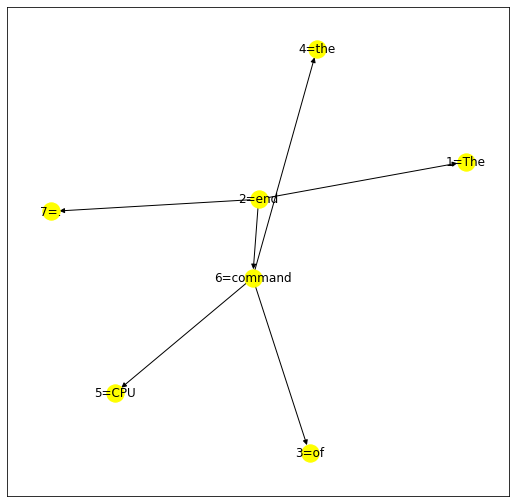

In [102]:
S = nx.DiGraph() 

nodes_list = []
# for node in dep_list:
#     nodes_list.append( (node[0], node[1]) )
nodes_list = [(1,1),(2,2),(3,2)]
nodes_list = [('2=end', '1=The'), ('6=command', '4=the'),('2=end', '6=command'),('2=end', '7=.'),('6=command', '3=of'),('6=command', '5=CPU')]
S.add_edges_from(nodes_list)

plt.figure(figsize =(9, 9)) 
nx.draw_networkx(S, with_label = True, node_color ='yellow') 

In [105]:
# DiGraph => out_edge, in_edges
for node in S.nodes:
    print(node, len(S.edges(node))) # edges = out_edge

2=end 3
1=The 0
6=command 3
4=the 0
7=. 0
3=of 0
5=CPU 0


----

# keyphrase weight

key-phrase weight = edge_of_node / word_count

- all_dep  
    - direct?  
        - in_edge =====X      ex:a->b [ |a| = 1]
        - out_edge ====X      ex:a->b [ |b| = 1]
    - undirect?  =======X  
- my_dep  
    - direct?  
        - in_edge =====X  
        - out_edge ====X  
    - undirect?  =======X  

## main_code

In [64]:
def get_keyphrase_weight(text, direct=False, in_edge=False, show_graph=False,all_dep=True):
    
    sent_list = ann_sent_info(text)
    node_dict, node_index = create_all_nodes(sent_list)
    dep_list = create_relation_between_node(sent_list, node_dict, node_index, all_dep)

    if direct:
        G = nx.DiGraph()
    else:
        G = nx.MultiGraph() 
    for i in dep_list: # [('cool=JJ', 'he=NN', 'nsubj')]
        G.add_edge(i[0], i[1], relation=i[2]) 
    if show_graph:
        nx.draw_networkx(G, with_label = True, node_color="yellow")
    
    # ======= calculate weight ======= 
    # count how many edge attach to each node
    node_edge_cnt_dict = dict()
    for node in G.nodes:
        if direct==True and in_edge==True:
            node_edge_cnt_dict[node] = len(G.in_edges(node))
        else: # defeault out_edge
            node_edge_cnt_dict[node] = len(G.edges(node))

    # count how many times a word had appear
    node_word_cnt_dict = dict()
    for node in node_dict:
        node_word_cnt_dict[node] = len(node_dict[node])

    weight_node_dict = dict()
    for node in node_edge_cnt_dict.keys():
        weight_node_dict[node] = node_edge_cnt_dict[node] #/ node_word_cnt_dict[node]
        #print(node , node_edge_cnt_dict[node] , "/", node_word_cnt_dict[node], "=", weight_node_dict[node])
    sorted_weight_node_dict = dict(sorted(weight_node_dict.items(), key=lambda k: k[1], reverse=True))
    return sorted_weight_node_dict

### example
#get_keyphrase_weight(new)
# tex = "Robin is walking away from the house. The house is very scary."
# get_keyphrase_weight(tex, direct=False, in_edge=False, show_graph=True, all_dep=False)

## all possibilities
- all_dep  
    - direct?  
        - in_edge =====X  
        - out_edge ====X  
    - undirect?  =======X  
- my_dep  
    - direct?  
        - in_edge =====X  
        - out_edge ====X  
    - undirect?  =======X  

### all_dep

In [9]:
tex = "Robin is walking away from the house. The house is very scary."

####  undirect

/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{'house=NN': 5,
 'walk=VB': 4,
 'scary=JJ': 4,
 'be=VB': 2,
 'away=RB': 2,
 '.=.': 2,
 'the=DT': 2,
 'Robin=NN': 1,
 'from=IN': 1,
 'very=RB': 1}

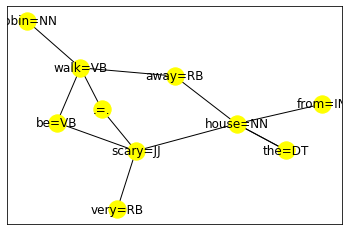

In [10]:
get_keyphrase_weight(tex, direct=False, in_edge=False, all_dep=True, show_graph=True)

####  direct, in_edge

/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


{'be=VB': 2,
 '.=.': 2,
 'house=NN': 2,
 'Robin=NN': 1,
 'away=RB': 1,
 'from=IN': 1,
 'the=DT': 1,
 'very=RB': 1,
 'walk=VB': 0,
 'scary=JJ': 0}

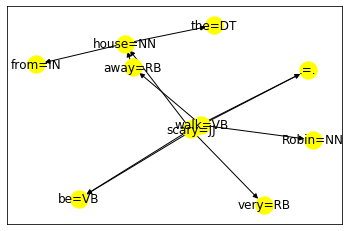

In [11]:
get_keyphrase_weight(tex, direct=True, in_edge=True, all_dep=True, show_graph=True)

#### direct, out_edge

/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


{'walk=VB': 4,
 'scary=JJ': 4,
 'house=NN': 2,
 'away=RB': 1,
 'Robin=NN': 0,
 'be=VB': 0,
 '.=.': 0,
 'from=IN': 0,
 'the=DT': 0,
 'very=RB': 0}

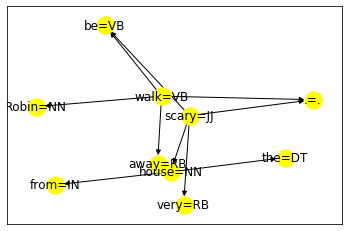

In [12]:
get_keyphrase_weight(tex, direct=True, in_edge=False, all_dep=True, show_graph=True)

### my_dep

#### undirect

/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{'walk=VB': 2,
 'away=RB': 2,
 'house=NN': 2,
 'scary=JJ': 2,
 'Robin=NN': 1,
 'very=RB': 1}

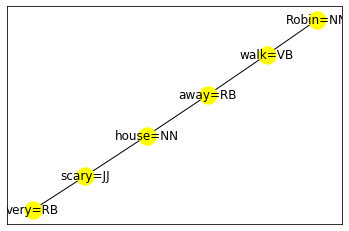

In [13]:
get_keyphrase_weight(tex, direct=False, in_edge=False, all_dep=False, show_graph=True)

#### direct, in_edge

/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


{'house=NN': 2,
 'walk=VB': 1,
 'Robin=NN': 1,
 'scary=JJ': 1,
 'away=RB': 0,
 'very=RB': 0}

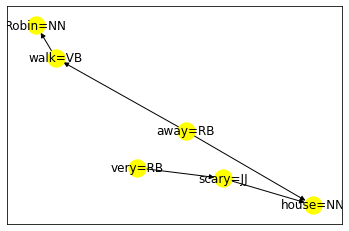

In [14]:
get_keyphrase_weight(tex, direct=True, in_edge=True, all_dep=False, show_graph=True)

#### direct, out_edge

/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/dragonfly/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


{'away=RB': 2,
 'walk=VB': 1,
 'very=RB': 1,
 'scary=JJ': 1,
 'Robin=NN': 0,
 'house=NN': 0}

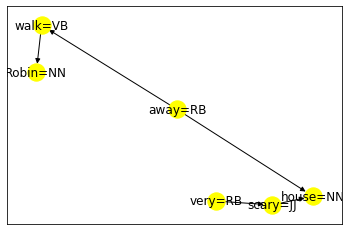

In [15]:
get_keyphrase_weight(tex, direct=True, in_edge=False, all_dep=False, show_graph=True)

## All possibility with news

### news1 weather

#### news

In [16]:
news1 = '''Typhoon Surigae is to bring rain to the nation’s east coast and mountainous areas in central and southern Taiwan from Wednesday to Friday, the Central Weather Bureau (CWB) said yesterday.
As of 2pm yesterday, the typhoon’s center was 1,170km southeast of Oluanpi (鵝鑾鼻), Taiwan’s southernmost tip. The radius of the storm was 280km, and it was moving northwest at 9kph, with a maximum wind speed of 198kph.
The bureau forecasts that the storm would switch to a northerly direction when approaching the east coast of Luzon Island in the Philippines on Wednesday, CWB forecaster Lin Ding-yi (林定宜) said, adding that Surigae would then move northeast along the Bashi Channel.
Chances of temporary showers would be high in Yilan, Hualien and Taitung counties, as well as in the mountainous areas of central and southern Taiwan, he said.
Surigae was to maintain its strength yesterday and today, Lin said, adding that similarly strong typhoons in April occurred in 1997, 2003 and 2015.
Typhoons usually occur from July to September, the bureau said.
Residents on the northern, eastern and southern coasts as well as those in Penghu and Kinmen counties should be prepared for swells, Lin said.
Peng Chi-ming (彭啟明), chief executive of WeatherRisk Explore Inc, yesterday wrote on Facebook that Surigae was at the peak of its strength, with lightning frequently occurring at its eye and convection at its circumfluence.
If it made landfall at this strength, it might cause a major disaster, he said.
However, it was a good sign that convective heat transfer in mountainous areas began to occur yesterday afternoon, Peng said.
“Convective heat transfer usually occurs on the west coast in April, but this year, it did not occur until yesterday,” he said.
Thermal instability in the mountains of southern Taiwan were influenced by the typhoon, he added.
CWB Director-General Cheng Ming-dean (鄭明典) said that Surigae has a double eyewall, which is generally a feature of strong typhoons, indicating that the storm might grow further before reaching Luzon.
However, Surigae would gradually weaken once it is moving away from Luzon, Cheng said, citing conditions unfavorable for the typhoon.
WeatherRisk analyst Wu Sheng-yu (吳聖宇) wrote on Facebook that Surigae would likely remain east of the Philippines for at least three to four days, and then accelerate its northward motion.
“When the westerly trough abates, Surigae could also bring rain from southeast China. This might be the best opportunity we have for rain since the beginning of this month. If rain does not occur this time, we might have to wait for next month,” Wu said.
Meanwhile, poor air quality was early yesterday recorded in the outlying island counties of Kinmen and Penghu, and parts of western Taiwan due to pollutants from China and stagnant winds, the Environmental Protection Administration said.
At 9am, 20 air monitoring stations in areas north of Hsinchu County and in Penghu and Kinmen detected generally unhealthy air quality at the “red alert” level, the agency said.
'''
print(news1)

Typhoon Surigae is to bring rain to the nation’s east coast and mountainous areas in central and southern Taiwan from Wednesday to Friday, the Central Weather Bureau (CWB) said yesterday.
As of 2pm yesterday, the typhoon’s center was 1,170km southeast of Oluanpi (鵝鑾鼻), Taiwan’s southernmost tip. The radius of the storm was 280km, and it was moving northwest at 9kph, with a maximum wind speed of 198kph.
The bureau forecasts that the storm would switch to a northerly direction when approaching the east coast of Luzon Island in the Philippines on Wednesday, CWB forecaster Lin Ding-yi (林定宜) said, adding that Surigae would then move northeast along the Bashi Channel.
Chances of temporary showers would be high in Yilan, Hualien and Taitung counties, as well as in the mountainous areas of central and southern Taiwan, he said.
Surigae was to maintain its strength yesterday and today, Lin said, adding that similarly strong typhoons in April occurred in 1997, 2003 and 2015.
Typhoons usually occu

#### all_dep

In [17]:
# undirect
get_keyphrase_weight(news1, direct=False, in_edge=True, all_dep=True, show_graph=False)
#'typhoon=NN': 2.6666666666666665,
#'typhoon_Surigae=NN': 1.0,

{'say=VB': 61,
 ',=,': 41,
 'occur=VB': 37,
 'the=DT': 26,
 '.=.': 21,
 'move=VB': 20,
 'coast=NN': 18,
 'bring=VB': 17,
 'area=NN': 16,
 'and=CC': 16,
 'typhoon=NN': 16,
 'of=IN': 15,
 'be=VB': 14,
 'Taiwan=NN': 14,
 'have=VB': 14,
 'in=IN': 13,
 'write=VB': 10,
 'peak=NN': 9,
 'CWB_Director_-_General_Cheng_Ming_-_dean=NN': 9,
 'remain=VB': 9,
 'island_county=NN': 9,
 'km_southeast=NN': 8,
 'Yilan_county=NN': 8,
 'strength=NN': 8,
 'sign=NN': 8,
 'heat_transfer=NN': 8,
 'feature=NN': 8,
 'southern=JJ': 7,
 'Central_Weather_Bureau=NN': 7,
 'Oluanpi=NN': 7,
 'at=IN': 7,
 'storm=NN': 7,
 'Surigae=NN': 7,
 'CWB_forecaster_Lin_Ding_-_yi=NN': 7,
 'Kinmen=NN': 7,
 'Peng_Chi_-_ming=NN': 7,
 'weaken=VB': 7,
 'at_least_three_to_four_day=NN': 7,
 'analyst_Wu_Sheng_-_yu=NN': 7,
 'opportunity=NN': 7,
 'record=VB': 7,
 'detect=VB': 7,
 'alert_level=NN': 7,
 ')=-RRB-': 6,
 '(=-LRB-': 6,
 'yesterday=NN': 6,
 'km=NN': 6,
 'wind_speed=NN': 6,
 'it=NN': 6,
 'a=DT': 6,
 'switch=VB': 6,
 'Philippines=NNPS

In [18]:
# direct, in_edge
get_keyphrase_weight(news1, direct=True, in_edge=True, all_dep=True, show_graph=False)
# typhoon_Surigae=NN': 1.0
# typhoon=NN': 0.8333333333333334

{',=,': 25,
 'the=DT': 18,
 'be=VB': 13,
 'of=IN': 13,
 'and=CC': 12,
 'in=IN': 10,
 '.=.': 10,
 'at=IN': 7,
 'Surigae=NN': 7,
 ')=-RRB-': 6,
 '(=-LRB-': 6,
 'a=DT': 6,
 'occur=VB': 6,
 'Taiwan=NN': 5,
 'from=IN': 5,
 'typhoon=NN': 5,
 'it=NN': 5,
 'would=MD': 5,
 'that=IN': 5,
 'for=IN': 5,
 'to=TO': 4,
 'coast=NN': 4,
 'area=NN': 4,
 'yesterday=NN': 4,
 'its=PRP$': 4,
 'might=MD': 4,
 'rain=NN': 3,
 '’s=POS': 3,
 'to=IN': 3,
 'southern=JJ': 3,
 'say=VB': 3,
 'move=VB': 3,
 'storm=NN': 3,
 'on=IN': 3,
 'strength=NN': 3,
 'Kinmen=NN': 3,
 'that=WDT': 3,
 'this=DT': 3,
 'heat_transfer=NN': 3,
 '“=``': 3,
 'air_quality=NN': 3,
 'typhoon_Surigae=NN': 2,
 'Wednesday_to_Friday=NN': 2,
 'east=JJ': 2,
 'Central_Weather_Bureau=NN': 2,
 '2_pm_yesterday=NN': 2,
 'as=IN': 2,
 'wind_speed=NN': 2,
 'with=IN': 2,
 'then=RB': 2,
 'Bashi_Channel=NN': 2,
 'bureau=NN': 2,
 'when=WRB': 2,
 'Luzon_Island=NN': 2,
 'Philippines=NNPS': 2,
 'CWB_forecaster_Lin_Ding_-_yi=NN': 2,
 'add=VB': 2,
 'Yilan_county=NN

In [19]:
# direct, out_edge
get_keyphrase_weight(news1, direct=True, in_edge=False, all_dep=True, show_graph=False)
#'typhoon=NN': 1.1666666666666667,
#'typhoon_Surigae=NN': 0.5,

{'say=VB': 28,
 'occur=VB': 26,
 'bring=VB': 15,
 'move=VB': 15,
 'coast=NN': 10,
 'have=VB': 10,
 'area=NN': 8,
 'km_southeast=NN': 8,
 'peak=NN': 8,
 'write=VB': 8,
 'remain=VB': 8,
 'typhoon=NN': 7,
 'sign=NN': 7,
 'feature=NN': 7,
 'opportunity=NN': 7,
 'island_county=NN': 7,
 'record=VB': 7,
 'detect=VB': 7,
 'Taiwan=NN': 6,
 'Oluanpi=NN': 6,
 'km=NN': 6,
 'Yilan_county=NN': 6,
 'influence=VB': 6,
 'weaken=VB': 6,
 'alert_level=NN': 6,
 'Central_Weather_Bureau=NN': 5,
 'wind_speed=NN': 5,
 'forecast=VB': 5,
 'switch=VB': 5,
 'maintain=VB': 5,
 'cause=VB': 5,
 'grow=VB': 5,
 'high=JJ': 4,
 'strength=NN': 4,
 '1997=CD': 4,
 'prepare=VB': 4,
 'Peng_Chi_-_ming=NN': 4,
 'make=VB': 4,
 'heat_transfer=NN': 4,
 'eyewall=NN': 4,
 'monitoring_station=NN': 4,
 '2_pm_yesterday=NN': 3,
 'Bashi_Channel=NN': 3,
 'direction=NN': 3,
 'approach=VB': 3,
 'Philippines=NNPS': 3,
 'add=VB': 3,
 'northern=JJ': 3,
 'Penghu_county=NN': 3,
 'Kinmen=NN': 3,
 'eye=NN': 3,
 'mountain=NN': 3,
 'Luzon=NN': 3,
 

#### my_dep

In [65]:
# undirect
get_keyphrase_weight(news1, direct=False, in_edge=True, all_dep=False, show_graph=False)
#                     old_dep  +d_wc        [new_dep]     +d_wc
#typhoon=NN':            6     1.167           6,        1.0
#Surigae=NN':            8     1.14            8,        1.14
#typhoon_Surigae=NN':    1     0.5             1,        0.5

{'say=VB': 27,
 'occur=VB': 26,
 'move=VB': 13,
 'bring=VB': 12,
 'have=VB': 10,
 'Surigae=NN': 8,
 'coast=NN': 7,
 'it=NN': 6,
 'typhoon=NN': 6,
 'write=VB': 6,
 'area=NN': 5,
 'high=JJ': 5,
 'those=DT': 5,
 'weaken=VB': 5,
 'remain=VB': 5,
 'Taiwan=NN': 4,
 'rain=NN': 4,
 'add=VB': 4,
 'he=NN': 4,
 'sign=NN': 4,
 'grow=VB': 4,
 'detect=VB': 4,
 'km_southeast=NN': 3,
 'storm=NN': 3,
 'switch=VB': 3,
 'approach=VB': 3,
 'maintain=VB': 3,
 'strength=NN': 3,
 'Kinmen=NN': 3,
 'peak=NN': 3,
 'make=VB': 3,
 'cause=VB': 3,
 'begin=VB': 3,
 'heat_transfer=NN': 3,
 'feature=NN': 3,
 'accelerate=VB': 3,
 'part=NN': 3,
 'Wednesday_to_Friday=NN': 2,
 'radius=NN': 2,
 'wind_speed=NN': 2,
 'then=RB': 2,
 'forecast=VB': 2,
 'bureau=NN': 2,
 'when=WRB': 2,
 'Philippines=NNPS': 2,
 'chance=NN': 2,
 'Lin=NN': 2,
 'April=NN': 2,
 'usually=RB': 2,
 'July_to_September=NN': 2,
 'prepare=VB': 2,
 'Facebook=NN': 2,
 'however=RB': 2,
 'not=RB': 2,
 'mountain=NN': 2,
 'generally=RB': 2,
 'Luzon=NN': 2,
 'away

In [66]:
# direct, in_edge
get_keyphrase_weight(news1, direct=True, in_edge=True, all_dep=False, show_graph=False)

#                     old_dep  +d_wc       [new_dep]   +d_wc
#typhoon=NN':            4    0.834             4,      0.66
#Surigae=NN':            8    1.14              8,      1.14
#typhoon_Surigae=NN':    1    0.5               1,      0.5

{'Surigae=NN': 8,
 'move=VB': 7,
 'occur=VB': 6,
 'coast=NN': 5,
 'it=NN': 5,
 'Taiwan=NN': 4,
 'area=NN': 4,
 'typhoon=NN': 4,
 'rain=NN': 3,
 'storm=NN': 3,
 'strength=NN': 3,
 'weaken=VB': 3,
 'bring=VB': 2,
 'Wednesday_to_Friday=NN': 2,
 'bureau=NN': 2,
 'Philippines=NNPS': 2,
 'he=NN': 2,
 'April=NN': 2,
 'July_to_September=NN': 2,
 'Kinmen=NN': 2,
 'sign=NN': 2,
 'heat_transfer=NN': 2,
 'have=VB': 2,
 'grow=VB': 2,
 'Luzon=NN': 2,
 'remain=VB': 2,
 'at_least_three_to_four_day=NN': 2,
 'motion=NN': 2,
 'the_beginning_of_this_month=NN': 2,
 'China=NN': 2,
 'Penghu=NN': 2,
 'typhoon_Surigae=NN': 1,
 'say=VB': 1,
 'Central_Weather_Bureau=NN': 1,
 '2_pm_yesterday=NN': 1,
 'center=NN': 1,
 'Oluanpi=NN': 1,
 'radius=NN': 1,
 'wind_speed=NN': 1,
 '9kph=CD': 1,
 '198kph=NN': 1,
 'Bashi_Channel=NN': 1,
 'switch=VB': 1,
 'direction=NN': 1,
 'approach=VB': 1,
 'Wednesday=NN': 1,
 'Luzon_Island=NN': 1,
 'CWB_forecaster_Lin_Ding_-_yi=NN': 1,
 'high=JJ': 1,
 'chance=NN': 1,
 'shower=NN': 1,
 'Y

##### direct. out_edge (no need)

In [22]:
# direct, out_edge
get_keyphrase_weight(news1, direct=True, in_edge=False, all_dep=False, show_graph=False)
# 'typhoon=NN': 0.16666666666666666,
# 'typhoon_Surigae=NN': 0.0,

{'say=VB': 22,
 'occur=VB': 16,
 'bring=VB': 9,
 'have=VB': 6,
 'move=VB': 5,
 'write=VB': 5,
 'high=JJ': 4,
 'those=DT': 4,
 'detect=VB': 4,
 'km_southeast=NN': 3,
 'add=VB': 3,
 'make=VB': 3,
 'remain=VB': 3,
 'coast=NN': 2,
 'then=RB': 2,
 'forecast=VB': 2,
 'switch=VB': 2,
 'approach=VB': 2,
 'when=WRB': 2,
 'maintain=VB': 2,
 'peak=NN': 2,
 'cause=VB': 2,
 'sign=NN': 2,
 'begin=VB': 2,
 'however=RB': 2,
 'feature=NN': 2,
 'generally=RB': 2,
 'grow=VB': 2,
 'away=RB': 2,
 'weaken=VB': 2,
 'accelerate=VB': 2,
 'opportunity=NN': 2,
 'part=NN': 2,
 'north=RB': 2,
 'Wednesday_to_Friday=NN': 1,
 'area=NN': 1,
 'km=NN': 1,
 'radius=NN': 1,
 'wind_speed=NN': 1,
 'northwest=RB': 1,
 'northeast=RB': 1,
 'chance=NN': 1,
 'similarly=RB': 1,
 'typhoon=NN': 1,
 'usually=RB': 1,
 'July_to_September=NN': 1,
 'resident=NN': 1,
 'prepare=VB': 1,
 'frequently=RB': 1,
 'chief_executive=NN': 1,
 'heat_transfer=NN': 1,
 'not=RB': 1,
 'mountain=NN': 1,
 'influence=VB': 1,
 'instability=NN': 1,
 'indicat

### new2 contrain water

##### news 

In [25]:
# source: https://www.taipeitimes.com/News/front/archives/2021/04/17/2003755843
# new_title = "Ministry raises restrictions to conserve water"
new2 = '''
The Ministry of Economic Affairs is to tighten water restrictions to prevent Taiwan from running out of water before the rainy season starts next month, the ministry said yesterday.
Hsinchu County remains on “orange alert,” although industrial users that consume more than 1,000m2 of water per day have been asked to reduce consumption by 13 percent, up from the previously required 11 percent, it said, adding that Kaohsiung and Tainan industrial users would have to reduce consumption by 11 percent, up from 7 percent.
Non-industrial large water users would have to reduce water consumption by 20 percent, up from 10 percent, it added.
In Taoyuan, water pressure for households is to be reduced all day, in extension to the current nighttime reduction.
“As the water shortage extends, there are only three things we can do: conserve, reallocate and find new sources of water,” Minister of Economic Affairs Wang Mei-hua (王美花) told reporters at the Central Emergency Operation Center dedicated to the nation’s water situation.
Taichung and Miaoli County, which face the strongest effects of the shortage, are on “red alert,” and water supply in the area is switched off on two days per week.
The measure has helped save about 15 percent of water, Wang said.
The alert level in Hsinchu would not be upgraded to red, she said, adding that no water outages were planned.
Pipelines supplying water from less affected regions have been instrumental in mitigating the situation, Wang said.
“The Taoyuan-Hsinchu pipeline is delivering 225,000 tonnes of water per day, with 10,000 of that going on to Miaoli,” Wang said. “A further 100,000 tonnes a day are delivered from Yunlin County to Chiayi County, and 50,000 tonnes are delivered from Tainan to Kaohsiung.”
New wells are also being drilled at a breakneck pace, with all available CPC Corp, Taiwan (台灣中油) engineers being employed by the ministry, she said.
“At two sites near Taichung, engineers struck ground water,” Wang said. “We are expediting the installation of filters and the certification of the well.”
The two wells might provide up to 48,000 tonnes per day, enough for 200,000 people, she added.
Nationwide, 88 emergency wells would be dug, adding to the 25 existing emergency wells, she said.
The wells would provide up to 115,000 tonnes as early as at the end of this month, enough to supply 500,000 people, she added
Engineers are drilling three wells in Miaoli County’s Liyutan (鯉魚潭), which would provide 15,000 tonnes per day, she said.
“We compressed months of work into weeks to find new water resources,” Wang said.
Asked whether the water level at the Shimen Reservoir (石門水庫), which supplies the Taoyuan-Hsinchu pipeline, might fall to below 30 percent, Wang said that the level is above expectations.
“In February and March, we were expecting the level to be lower than it is now,” Wang said. “We are trying to find alternate sources to make sure that the level remains as high as possible.”
'''
print(news2)


The Ministry of Economic Affairs is to tighten water restrictions to prevent Taiwan from running out of water before the rainy season starts next month, the ministry said yesterday.
Hsinchu County remains on “orange alert,” although industrial users that consume more than 1,000m2 of water per day have been asked to reduce consumption by 13 percent, up from the previously required 11 percent, it said, adding that Kaohsiung and Tainan industrial users would have to reduce consumption by 11 percent, up from 7 percent.
Non-industrial large water users would have to reduce water consumption by 20 percent, up from 10 percent, it added.
In Taoyuan, water pressure for households is to be reduced all day, in extension to the current nighttime reduction.
“As the water shortage extends, there are only three things we can do: conserve, reallocate and find new sources of water,” Minister of Economic Affairs Wang Mei-hua (王美花) told reporters at the Central Emergency Operation Center dedicated to th

##### all_dep

In [26]:
# undirect
get_keyphrase_weight(news2, direct=False, in_edge=True, all_dep=True, show_graph=False)
# water=NN': 1.7
# water_restriction=NN': 1.0,

{'say=VB': 65,
 ',=,': 43,
 'be=VB': 32,
 'the=DT': 28,
 'reduce=VB': 28,
 '.=.': 21,
 'deliver=VB': 21,
 'provide=VB': 20,
 'tonne=NN': 19,
 'well=NN': 19,
 'water=NN': 17,
 'add=VB': 16,
 'level=NN': 14,
 'remain=VB': 12,
 'have=VB': 12,
 'drill=VB': 12,
 'to=TO': 11,
 'of=IN': 11,
 "”=''": 10,
 '“=``': 10,
 'user=NN': 10,
 'day=NN': 10,
 'to=IN': 10,
 'alert=NN': 10,
 'supply=VB': 10,
 'find=VB': 9,
 '石門水庫=NN': 9,
 'ask=VB': 8,
 '11_percent=NN': 8,
 'do=VB': 8,
 'pipeline=NN': 8,
 'dig=VB': 8,
 'expect=VB': 8,
 'from=IN': 7,
 'and=CC': 7,
 'in=IN': 7,
 'Taichung=NN': 7,
 'Wang=NN': 7,
 'upgrade=VB': 7,
 'the_end_of_this_month=NN': 7,
 'tighten=VB': 6,
 'up=RB': 6,
 'would=MD': 6,
 'Wang_Mei_-_hua=NN': 6,
 'tell=VB': 6,
 'Central_Emergency_Operation_Center=NN': 6,
 'Miaoli_County=NN': 6,
 'she=NN': 6,
 'Taoyuan_-_Hsinchu=NN': 6,
 'strike=VB': 6,
 'expedite=VB': 6,
 'try=VB': 6,
 'Ministry_of_Economic_Affairs=NNPS': 5,
 'run=VB': 5,
 'season=NN': 5,
 'ministry=NN': 5,
 'per=IN': 5,
 '

In [27]:
# direct, in_edge
get_keyphrase_weight(news2, direct=True, in_edge=True, all_dep=True, show_graph=False)
# 'water_restriction=NN': 1.0,
# 'water=NN': 1.0,

{'the=DT': 19,
 ',=,': 18,
 'be=VB': 17,
 '.=.': 12,
 'water=NN': 10,
 'to=IN': 10,
 'to=TO': 7,
 'from=IN': 7,
 'of=IN': 7,
 "”=''": 7,
 'and=CC': 7,
 'in=IN': 7,
 '“=``': 6,
 'we=NN': 5,
 'at=IN': 5,
 'level=NN': 5,
 'well=NN': 5,
 'on=IN': 4,
 'day=NN': 4,
 'have=VB': 4,
 'by=IN': 4,
 'would=MD': 4,
 'that=IN': 4,
 '(=-LRB-': 4,
 ')=-RRB-': 4,
 'as=IN': 4,
 'say=VB': 3,
 '11_percent=NN': 3,
 'it=NN': 3,
 'add=VB': 3,
 'find=VB': 3,
 'Miaoli_County=NN': 3,
 'which=WDT': 3,
 'pipeline=NN': 3,
 'supply=VB': 3,
 'deliver=VB': 3,
 'Ministry_of_Economic_Affairs=NNPS': 2,
 'water_restriction=NN': 2,
 'next_month=NN': 2,
 'ministry=NN': 2,
 'Hsinchu_County=NN': 2,
 'orange_alert=NN': 2,
 'ask=VB': 2,
 'user=NN': 2,
 'than=IN': 2,
 'per=IN': 2,
 'reduce=VB': 2,
 '13_percent=NN': 2,
 'Kaohsiung=NN': 2,
 'Tainan=NN': 2,
 '7_percent=NN': 2,
 '20_percent=NN': 2,
 '10_percent=NN': 2,
 'water_pressure=NN': 2,
 'all=DT': 2,
 'nighttime_reduction=NN': 2,
 'for=IN': 2,
 'three=CD': 2,
 'source=NN': 2

In [28]:
# direct, out_edge
get_keyphrase_weight(news2, direct=True, in_edge=False, all_dep=True, show_graph=False)
# water_restriction=NN': 0.5
# water=NN': 0.3

{'say=VB': 27,
 'deliver=VB': 14,
 'reduce=VB': 13,
 'tonne=NN': 12,
 'remain=VB': 11,
 'alert=NN': 10,
 'provide=VB': 10,
 'be=VB': 9,
 'add=VB': 9,
 'well=NN': 9,
 'drill=VB': 8,
 'do=VB': 7,
 'upgrade=VB': 7,
 'supply=VB': 7,
 '石門水庫=NN': 7,
 'expect=VB': 7,
 'ask=VB': 6,
 'user=NN': 6,
 'dig=VB': 6,
 'tighten=VB': 5,
 '11_percent=NN': 5,
 'find=VB': 5,
 'tell=VB': 5,
 'level=NN': 5,
 'strike=VB': 5,
 'expedite=VB': 5,
 'try=VB': 5,
 'run=VB': 4,
 'season=NN': 4,
 'have=VB': 4,
 'nighttime_reduction=NN': 4,
 'conserve=VB': 4,
 'Taichung=NN': 4,
 'instrumental=JJ': 4,
 'compress=VB': 4,
 'fall=VB': 4,
 'expectation=NN': 4,
 'prevent=VB': 3,
 'water=NN': 3,
 'orange_alert=NN': 3,
 '“=``': 3,
 'consume=VB': 3,
 'up=RB': 3,
 'source=NN': 3,
 'Wang_Mei_-_hua=NN': 3,
 'Central_Emergency_Operation_Center=NN': 3,
 'water_situation=NN': 3,
 'Miaoli_County=NN': 3,
 'effect=NN': 3,
 'water_supply=NN': 3,
 'switch_off=VB': 3,
 'two_day=NN': 3,
 'help=VB': 3,
 '15_percent=NN': 3,
 'plan=VB': 3,
 

##### my_dep

In [52]:
# undirect
get_keyphrase_weight(news2, direct=False, in_edge=True, all_dep=False, show_graph=False)
#                        old_dep  +d_wc        [new_dep]      d_wc
# water=NN':                7      0.7,            7         0.7
# water_restriction=NN':    1      0.5             1         0.5

{'say=VB': 25,
 'reduce=VB': 14,
 'deliver=VB': 10,
 'add=VB': 8,
 'tonne=NN': 8,
 'water=NN': 7,
 'Wang=NN': 7,
 'provide=VB': 7,
 'up=RB': 6,
 'have=VB': 6,
 'level=NN': 6,
 'she=NN': 6,
 'supply=VB': 6,
 'remain=VB': 5,
 'day=NN': 5,
 'we=NN': 5,
 'well=NN': 5,
 'expect=VB': 5,
 'tighten=VB': 4,
 'tell=VB': 4,
 'be=VB': 4,
 'drill=VB': 4,
 'strike=VB': 4,
 'compress=VB': 4,
 'find=VB': 4,
 'consume=VB': 3,
 'ask=VB': 3,
 'consumption=NN': 3,
 'it=NN': 3,
 'source=NN': 3,
 'which=WDT': 3,
 'Taichung=NN': 3,
 'help=VB': 3,
 '15_percent=NN': 3,
 'pipeline=NN': 3,
 'expedite=VB': 3,
 'enough=RB': 3,
 'fall=VB': 3,
 'Ministry_of_Economic_Affairs=NNPS': 2,
 'prevent=VB': 2,
 'run=VB': 2,
 'ministry=NN': 2,
 'm2=NN': 2,
 '11_percent=NN': 2,
 'user=NN': 2,
 'extension=NN': 2,
 'do=VB': 2,
 'face=VB': 2,
 'effect=NN': 2,
 'water_supply=NN': 2,
 'two_day=NN': 2,
 'week=NN': 2,
 'save=VB': 2,
 'upgrade=VB': 2,
 'instrumental=JJ': 2,
 '10,000=CD': 2,
 'site=NN': 2,
 'engineer=NN': 2,
 'certific

In [53]:
# direct, in_edge
get_keyphrase_weight(news2, direct=True, in_edge=True, all_dep=False, show_graph=False)
#                        old_dep   +d_wc    [new_dep]    d_wc
# water=NN':                7       0.7         7        0.7
# water_restriction=NN':    1       0.5         1        0.5

{'water=NN': 7,
 'we=NN': 5,
 'level=NN': 4,
 'well=NN': 4,
 'day=NN': 3,
 'reduce=VB': 3,
 'it=NN': 3,
 'which=WDT': 3,
 'Taichung=NN': 3,
 'pipeline=NN': 3,
 'Ministry_of_Economic_Affairs=NNPS': 2,
 'say=VB': 2,
 'ministry=NN': 2,
 '11_percent=NN': 2,
 'source=NN': 2,
 'be=VB': 2,
 'week=NN': 2,
 '15_percent=NN': 2,
 'she=NN': 2,
 'tonne=NN': 2,
 'engineer=NN': 2,
 'people=NN': 2,
 'the_end_of_this_month=NN': 2,
 '30_percent=NN': 2,
 'high=JJ': 2,
 'tighten=VB': 1,
 'water_restriction=NN': 1,
 'prevent=VB': 1,
 'Taiwan=NN': 1,
 'season=NN': 1,
 'remain=VB': 1,
 'orange_alert=NN': 1,
 'Hsinchu_County=NN': 1,
 'that=WDT': 1,
 'm2=NN': 1,
 '1,000=CD': 1,
 'consumption=NN': 1,
 '13_percent=NN': 1,
 'require=VB': 1,
 'have=VB': 1,
 'user=NN': 1,
 '7_percent=NN': 1,
 '20_percent=NN': 1,
 '10_percent=NN': 1,
 'extension=NN': 1,
 'Taoyuan=NN': 1,
 'nighttime_reduction=NN': 1,
 'household=NN': 1,
 'thing=NN': 1,
 'Economic_Affairs=NNPS': 1,
 'tell=VB': 1,
 'Central_Emergency_Operation_Center=

###### direct, out_edge (no need)

In [31]:
# direct, out_edge
get_keyphrase_weight(news2, direct=True, in_edge=False, all_dep=False, show_graph=False)
# water=NN: 0.0
# water_restriction=NN': 0.0

{'say=VB': 14,
 'deliver=VB': 8,
 'reduce=VB': 6,
 'add=VB': 6,
 'supply=VB': 5,
 'remain=VB': 4,
 'up=RB': 4,
 'expect=VB': 4,
 'tighten=VB': 3,
 'consume=VB': 3,
 'ask=VB': 3,
 'tell=VB': 3,
 'tonne=NN': 3,
 'drill=VB': 3,
 'strike=VB': 3,
 'expedite=VB': 3,
 'enough=RB': 3,
 'provide=VB': 3,
 'compress=VB': 3,
 'find=VB': 3,
 'run=VB': 2,
 'have=VB': 2,
 'do=VB': 2,
 'be=VB': 2,
 'face=VB': 2,
 'water_supply=NN': 2,
 'help=VB': 2,
 'level=NN': 2,
 'to=IN': 2,
 'fall=VB': 2,
 'try=VB': 2,
 'Ministry_of_Economic_Affairs=NNPS': 1,
 'prevent=VB': 1,
 'm2=NN': 1,
 'more=JJ': 1,
 'previously=RB': 1,
 'extension=NN': 1,
 'water_pressure=NN': 1,
 'conserve=VB': 1,
 'source=NN': 1,
 'Minister=NN': 1,
 'dedicate=VB': 1,
 'extend=VB': 1,
 'only=RB': 1,
 'effect=NN': 1,
 'alert=NN': 1,
 'switch_off=VB': 1,
 'two_day=NN': 1,
 'save=VB': 1,
 '15_percent=NN': 1,
 'about=RB': 1,
 'not=RB': 1,
 'upgrade=VB': 1,
 'less=JJ': 1,
 'instrumental=JJ': 1,
 'mitigate=VB': 1,
 '10,000=CD': 1,
 'go=VB': 1,
 '

## Overall

#### keyword rank order

In [65]:
gg = {'tighten=VB': 1.0,
 'water_restriction=NN': 1.0,
 'prevent=VB': 1.0,
 'Taiwan=NN': 1.0,
 'run=VB': 1.0,
 'water=NN': 1.0,
 'season=NN': 1.0,
 'next_month=NN': 1.0,
 'from=IN': 1.0,
 'out=IN': 1.0,
 'before=IN': 1.0,
 'rainy=JJ': 1.0,
 'start=NN': 1.0,
 'ministry=NN': 1.0,
 'yesterday=NN': 1.0,
 'Hsinchu_County=NN': 1.0,
 'orange_alert=NN': 1.0,
 'ask=VB': 1.0,
 'on=IN': 1.0,
 'consume=VB': 1.0,
 'that=WDT': 1.0,
 'm2=NN': 1.0,
 'more=JJ': 1.0,
 'than=IN': 1.0,
 '1,000=CD': 1.0,
 'although=IN': 1.0,
 '13_percent=NN': 1.0,
 'by=IN': 1.0,
 'require=VB': 1.0,
 'previously=RB': 1.0,
 'it=NN': 1.0,
 'Kaohsiung=NN': 1.0,
 'Tainan=NN': 1.0,
 'and=CC': 1.0,
 'that=IN': 1.0,
 '7_percent=NN': 1.0,
 '20_percent=NN': 1.0,
 '10_percent=NN': 1.0,
 'non-industrial=JJ': 1.0,
 'large=JJ': 1.0,
 'extension=NN': 1.0,
 'Taoyuan=NN': 1.0,
 'water_pressure=NN': 1.0,
 'all=DT': 1.0,
 'in=IN': 1.0,
 'nighttime_reduction=NN': 1.0,
 'to=IN': 1.0,
 'current_nighttime=NN': 1.0,
 'household=NN': 1.0,
 'for=IN': 1.0,
 'thing=NN': 1.0,
 'three=CD': 1.0,
 'do=VB': 1.0,
 'we=NN': 1.0,
 'can=MD': 1.0,
 ':=:': 1.0,
 'conserve=VB': 1.0,
 'reallocate=VB': 1.0,
 'find=VB': 1.0,
 'source=NN': 1.0,
 'new=JJ': 1.0,
 'Minister=NN': 1.0,
 'Economic_Affairs=NNPS': 1.0,
 '王美花=NN': 1.0,
 '(=-LRB-': 1.0,
 ')=-RRB-': 1.0,
 'tell=VB': 1.0,
 'dedicate=VB': 1.0,
 'reporter=NN': 1.0,
 'at=IN': 1.0,
 'water_situation=NN': 1.0,
 'nation=NN': 1.0,
 '’s=POS': 1.0,
 'water_shortage=NN': 1.0,
 'extend=VB': 1.0,
 'as=IN': 1.0,
 'there=EX': 1.0,
 'only=RB': 1.0,
 'Taichung=NN': 1.0,
 'face=VB': 1.0,
 'which=WDT': 1.0,
 'effect=NN': 1.0,
 'strongest=JJ': 1.0,
 'shortage=NN': 1.0,
 'red=JJ': 1.0,
 'water_supply=NN': 1.0,
 'switch_off=VB': 1.0,
 'area=NN': 1.0,
 'two_day=NN': 1.0,
 'week=NN': 1.0,
 'measure=NN': 1.0,
 'help=VB': 1.0,
 'save=VB': 1.0,
 '15_percent=NN': 1.0,
 'about=RB': 1.0,
 'plan=VB': 1.0,
 'water_outage=NN': 1.0,
 'level=NN': 1.0,
 'Hsinchu=NN': 1.0,
 'alert=JJ': 1.0,
 'not=RB': 1.0,
 'no=DT': 1.0,
 'pipeline=NN': 1.0,
 'supply=VB': 1.0,
 'region=NN': 1.0,
 'affect=VB': 1.0,
 'less=JJ': 1.0,
 'instrumental=JJ': 1.0,
 'mitigate=VB': 1.0,
 'situation=NN': 1.0,
 'deliver=VB': 1.0,
 '10,000=CD': 1.0,
 '225,000=CD': 1.0,
 'with=IN': 1.0,
 'that=DT': 1.0,
 'go=VB': 1.0,
 'Miaoli=NN': 1.0,
 'a=DT': 1.0,
 'further=JJ': 1.0,
 '100,000=CD': 1.0,
 'a_day=NN': 1.0,
 'Chiayi_County=NN': 1.0,
 'Yunlin_County=NN': 1.0,
 '50,000=CD': 1.0,
 'New_well=NN': 1.0,
 'also=RB': 1.0,
 'pace=NN': 1.0,
 'breakneck=JJ': 1.0,
 'CPC_Corp=NN': 1.0,
 'Taiwan_engineer=NN': 1.0,
 '台灣中油=NN': 1.0,
 'employ=VB': 1.0,
 'available=JJ': 1.0,
 'site=NN': 1.0,
 'two=CD': 1.0,
 'near=IN': 1.0,
 'strike=VB': 1.0,
 'engineer=NN': 1.0,
 'ground=NN': 1.0,
 'filter=NN': 1.0,
 'certification=NN': 1.0,
 'expedite=VB': 1.0,
 'installation=NN': 1.0,
 'enough=RB': 1.0,
 'people=NN': 1.0,
 '200,000=CD': 1.0,
 'might=MD': 1.0,
 '48,000=CD': 1.0,
 'up=RP': 1.0,
 '25=CD': 1.0,
 'exist=VB': 1.0,
 'dig=VB': 1.0,
 '88=CD': 1.0,
 'nationwide=RB': 1.0,
 'Liyutan=NN': 1.0,
 '115,000=CD': 1.0,
 'early=JJ': 1.0,
 '500,000=CD': 1.0,
 '鯉魚潭=NN': 1.0,
 '15,000=CD': 1.0,
 'compress=VB': 1.0,
 'month=NN': 1.0,
 'work=NN': 1.0,
 'into=IN': 1.0,
 'water_resource=NN': 1.0,
 'fall=VB': 1.0,
 '石門水庫=NN': 1.0,
 'Shimen_Reservoir=NN': 1.0,
 '30_percent=NN': 1.0,
 'whether=IN': 1.0,
 'below=RB': 1.0,
 'expectation=NN': 1.0,
 'above=IN': 1.0,
 'February=NN': 1.0,
 'March=NN': 1.0,
 'expect=VB': 1.0,
 'lower=JJ': 1.0,
 'now=RB': 1.0,
 'try=VB': 1.0,
 'make=VB': 1.0,
 'alternate=JJ': 1.0,
 'high=JJ': 1.0,
 'sure=JJ': 1.0,
 'as=RB': 1.0,
 'possible=JJ': 1.0,
 'well=NN': 0.8333333333333334,
 'day=NN': 0.8,
 'have=VB': 0.8,
 '11_percent=NN': 0.75,
 'Miaoli_County=NN': 0.75,
 'be=VB': 0.7083333333333334,
 "”=''": 0.7,
 'the=DT': 0.6785714285714286,
 'user=NN': 0.6666666666666666,
 'would=MD': 0.6666666666666666,
 'to=TO': 0.6363636363636364,
 'of=IN': 0.6363636363636364,
 '“=``': 0.6,
 '.=.': 0.5714285714285714,
 'Ministry_of_Economic_Affairs=NNPS': 0.5,
 'remain=VB': 0.5,
 'industrial=JJ': 0.5,
 'reduce=VB': 0.5,
 'add=VB': 0.5,
 'Wang_Mei_-_hua=NN': 0.5,
 'Central_Emergency_Operation_Center=NN': 0.5,
 'drill=VB': 0.5,
 'emergency=NN': 0.5,
 ',=,': 0.4186046511627907,
 'per=IN': 0.4,
 'the_end_of_this_month=NN': 0.4,
 'consumption=NN': 0.3333333333333333,
 'up=RB': 0.3333333333333333,
 'she=NN': 0.3333333333333333,
 'Taoyuan_-_Hsinchu=NN': 0.3333333333333333,
 'tonne=NN': 0.3333333333333333,
 'provide=VB': 0.3333333333333333,
 'say=VB': 0.23076923076923078,
 'Wang=NN': 0.14285714285714285,
 'alert=NN': 0.0,
 'upgrade=VB': 0.0}

print(len(gg))
for idx, i in enumerate(gg):
    if i == 'water=NN':
        print(  'water=NN: {:.2f}%'.format(idx/len(gg)*100) ,'\t', idx)
    if i == 'water_restriction=NN':
        print( 'water_restriction=NN: {:.2f}%'.format(idx/len(gg)*100) ,'\t', idx)

221
water_restriction=NN: 0.45% 	 1
water=NN: 2.26% 	 5


# test RAKE

##### stopwords

In [30]:
stopwords = []
with open("./RAKE/SmartStoplist.txt", 'r') as f:
    stopwords=f.read()
print(stopwords)

#stop word list from SMART (Salton,1971).  Available at ftp://ftp.cs.cornell.edu/pub/smart/english.stop
a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enoug

##### test RAKE

In [36]:
from RAKE.rake import Rake

[('minimal generating sets', 8.666666666666666), ('linear diophantine equations', 8.5), ('minimal supporting set', 7.666666666666666), ('minimal set', 4.666666666666666), ('linear constraints', 4.5), ('natural numbers', 4.0), ('strict inequations', 4.0), ('nonstrict inequations', 4.0)]
[('minimal generating sets', 8.666666666666666), ('linear diophantine equations', 8.5), ('minimal supporting set', 7.666666666666666), ('minimal set', 4.666666666666666), ('linear constraints', 4.5), ('natural numbers', 4.0), ('strict inequations', 4.0), ('nonstrict inequations', 4.0), ('upper bounds', 4.0), ('mixed types', 3.666666666666667), ('considered types', 3.166666666666667), ('set', 2.0), ('types', 1.6666666666666667), ('considered', 1.5), ('compatibility', 1.0), ('systems', 1.0), ('criteria', 1.0), ('system', 1.0), ('components', 1.0), ('solutions', 1.0), ('algorithms', 1.0), ('construction', 1.0), ('constructing', 1.0), ('solving', 1.0)]


In [41]:
tex = "Robin is walking away from the house. The house is very scary."

In [42]:
stoppath = "./RAKE/SmartStoplist.txt"
r = Rake(stoppath)
r.run(tex)

[('robin', 1.0), ('walking', 1.0), ('house', 1.0), ('scary', 1.0)]

In [44]:
t = "Robin is tall, nice and cool."
r.run(t)

[('robin', 1.0), ('tall', 1.0), ('nice', 1.0), ('cool', 1.0)]